In [15]:
from google.colab import files
uploaded = files.upload()
#uploading attached file into this collab


Saving chatgpt_reviews.csv to chatgpt_reviews (1).csv


In [16]:
import pandas as pd

df = pd.read_csv("chatgpt_reviews.csv")
df.head()
#2.Loading the dataset sheet as a base sheet


,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [17]:
#3. Inspecting and cleaning the datasheet

df.info()
df.isnull().sum()
df.columns = df.columns.str.lower().str.replace(" ", "_")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


In [18]:
#Handling missing reviews
df['review'] = df['review'].fillna("No Review")


In [20]:
print(df.columns)

Index(['review_id', 'review', 'ratings', 'review_date'], dtype='object')


In [21]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
#Setting rating column as numeric


In [24]:
#Installing the NLP
!pip install textblob


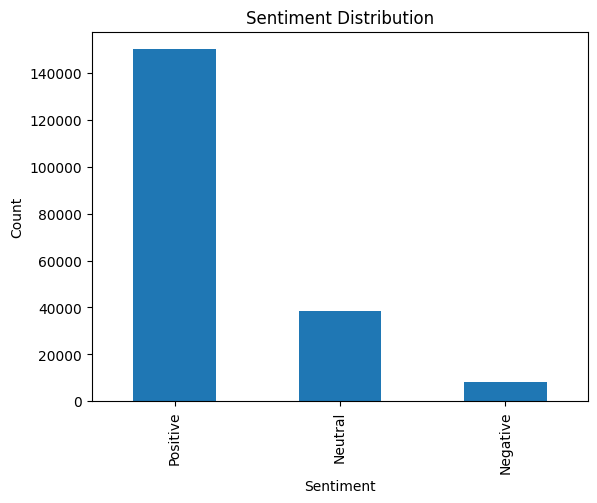

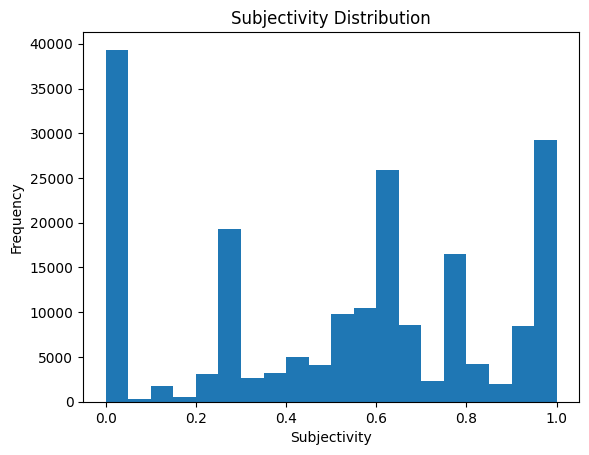

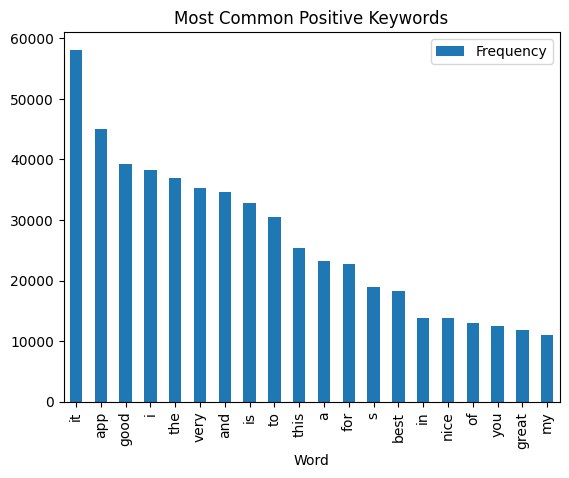

In [31]:
#Importing the libraries
# Giving sentimental analysis & Catgorising
from textblob import TextBlob
import matplotlib.pyplot as plt
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

df['polarity'] = df['review'].apply(get_sentiment)
df['subjectivity'] = df['review'].apply(get_subjectivity)

def categorize(p):
    if p > 0:
        return "Positive"
    elif p < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['polarity'].apply(categorize)
df.head()

#Sentiment Distribution visulization

df['sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

#Subjectivity Distribution

plt.hist(df['subjectivity'], bins=20)
plt.title("Subjectivity Distribution")
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")
plt.show()

#Positive Review Keyword Extraction

from collections import Counter
import re

positive_reviews = df[df['sentiment'] == 'Positive']['review']

words = []
for review in positive_reviews:
    words += re.findall(r'\b\w+\b', review.lower())

common_words = Counter(words).most_common(20)
common_words

#Frequency of the keyword

words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

words_df.plot(x='Word', y='Frequency', kind='bar')
plt.title("Most Common Positive Keywords")
plt.show()





In [32]:
#saving the code
df.to_csv("chatgpt_review_sentiment_output.csv", index=False)


In [33]:
#Download
files.download("chatgpt_review_sentiment_output.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>